In [48]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import math
import copy

import numpy as np
import gym
import gym_keygrid
import pandas as pd

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
from utils import policy_display, states_display, qtable_display, plot_state_freq, plot_scores

### 1D env

In [50]:
env = gym.make('keygrid-v0', grid_length=20)
env.render()

You are using the KeyGridSparse environment with length 20
| A | * | * | * | * | * | * | * | * | * | * | * | * | * | * | K | * | * | * | * | 


In [51]:
L = 1500
logs = False

(0.0, 100.0)

<Figure size 720x360 with 0 Axes>

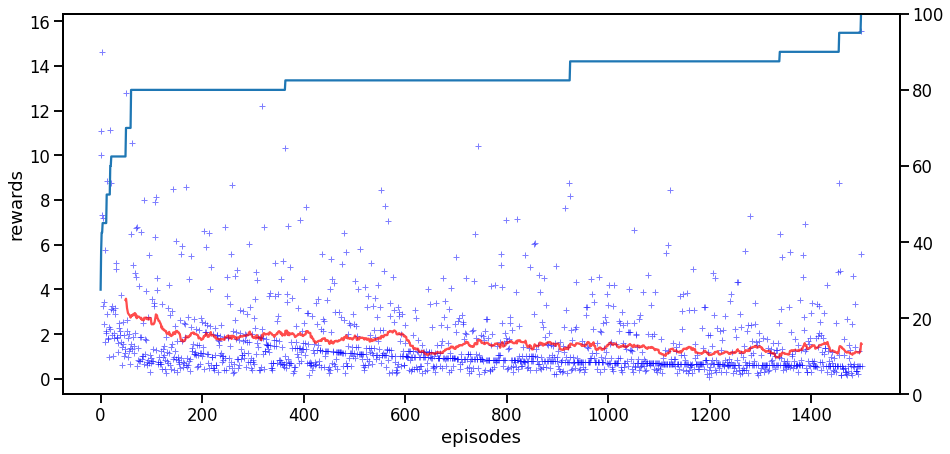

In [52]:
from reinforce_count_seq import train

agent1 = train(env, L, logs=logs)
plot_scores(agent1.intrinsic_scores, window_size=50)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(np.arange(L), agent1.space_visitation)
ax2.set_ylim([0, 100])

(0.0, 100.0)

<Figure size 720x360 with 0 Axes>

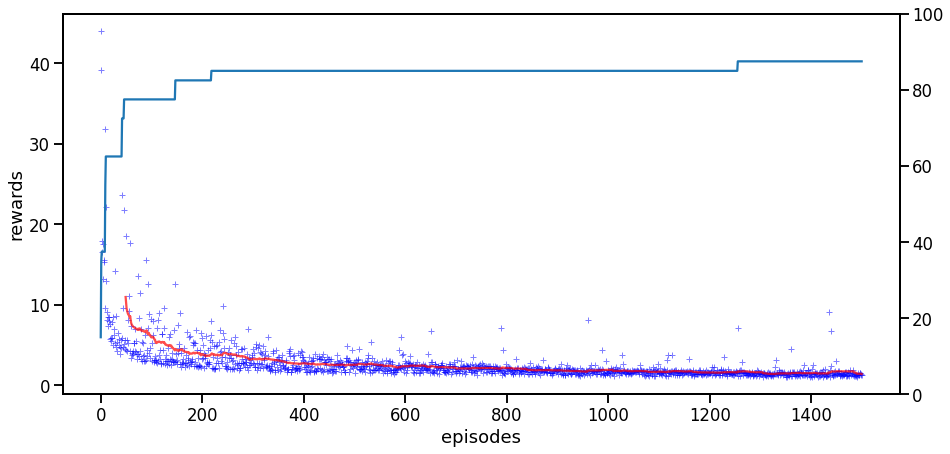

In [53]:
from reinforce_count_states import train

agent2 = train(env, L, logs=logs)
plot_scores(agent2.intrinsic_scores, window_size=50)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(np.arange(L), agent2.space_visitation)
ax2.set_ylim([0, 100])

### 2D env

In [79]:
env = gym.make('keygrid-v1', grid_length=8)
env.render()

KeyGrid2d
| A | * | * | * | * | * | * | * | 
| * | * | * | * | * | * | * | * | 
| * | * | * | * | * | * | * | * | 
| * | * | * | * | * | * | * | * | 
| * | * | * | * | * | * | * | * | 
| * | * | * | * | * | * | * | * | 
| * | * | * | * | * | * | K | * | 
| * | * | * | * | * | * | * | * | 



In [83]:
L = 2000
logs = False

(0.0, 100.0)

<Figure size 720x360 with 0 Axes>

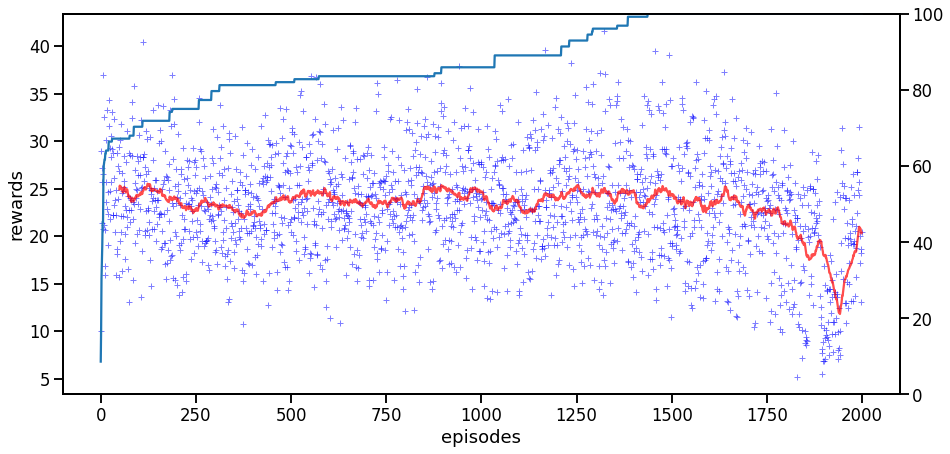

In [84]:
from reinforce_count_seq import train

agent3 = train(env, L, logs=logs)
plot_scores(agent3.intrinsic_scores, window_size=50)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(np.arange(L), agent3.space_visitation)
ax2.set_ylim([0, 100])

(0.0, 100.0)

<Figure size 720x360 with 0 Axes>

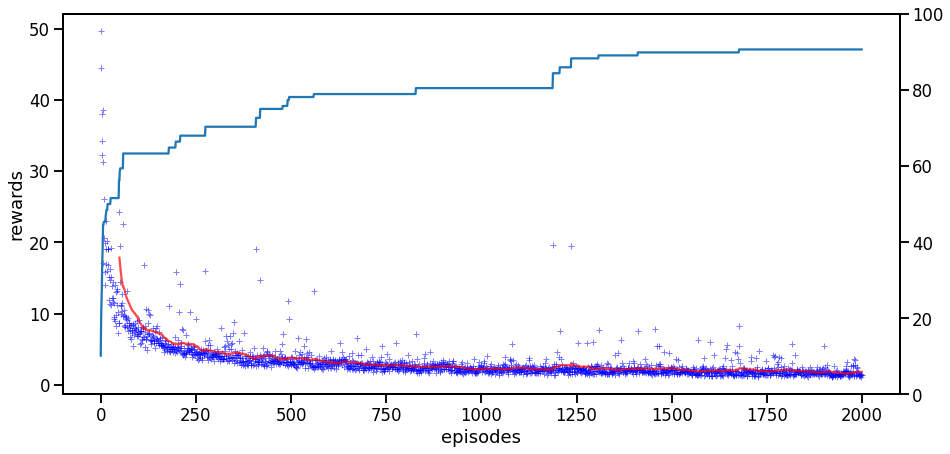

In [85]:
from reinforce_count_states import train

agent4 = train(env, L, logs=logs)
plot_scores(agent4.intrinsic_scores, window_size=50)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(np.arange(L), agent4.space_visitation)
ax2.set_ylim([0, 100])

In [86]:
agents = [agent1, agent2, agent3, agent4]

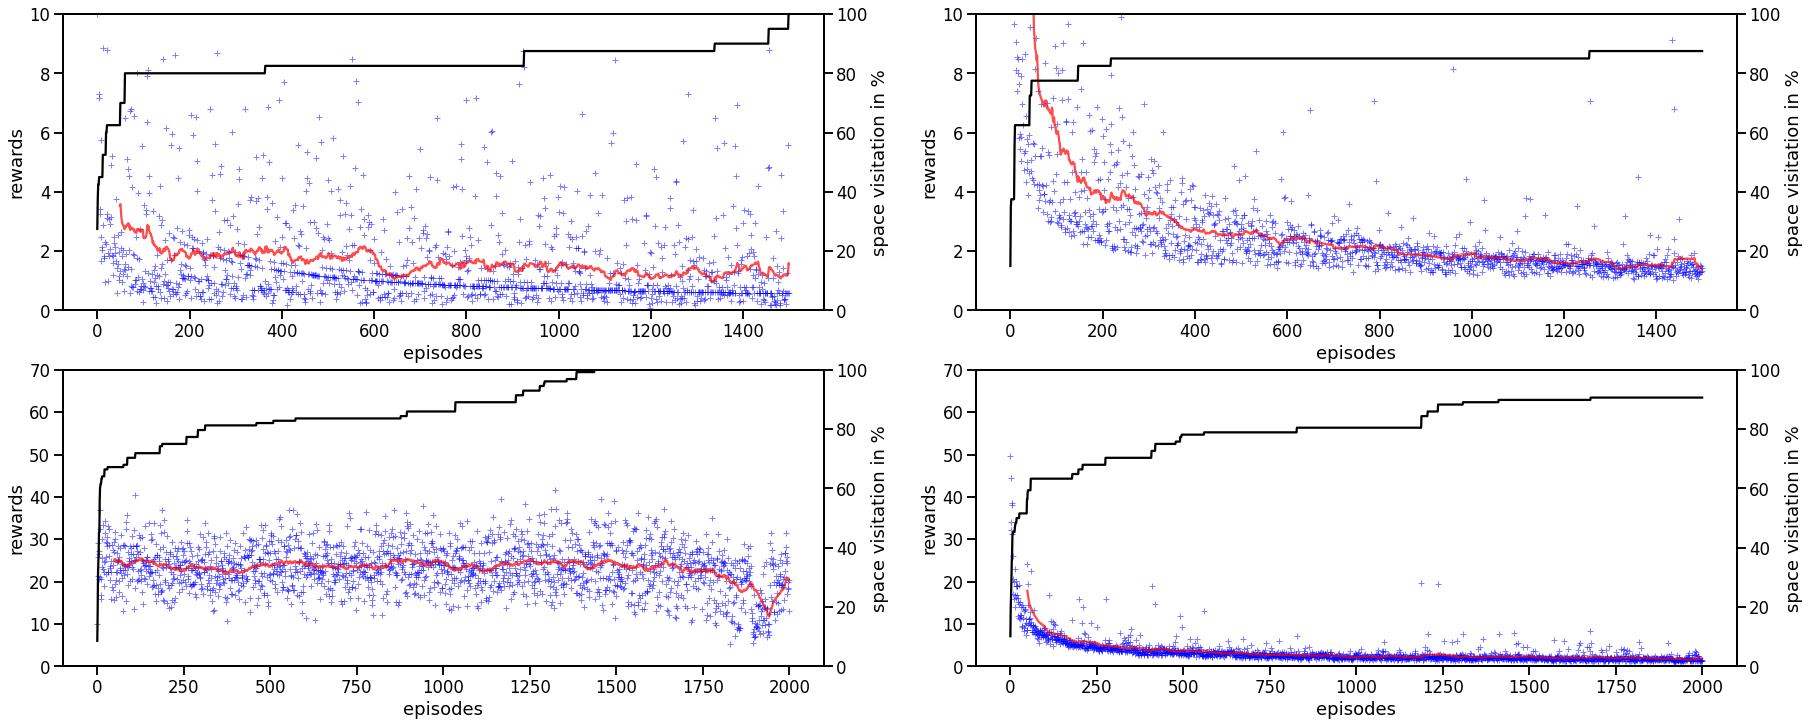

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(30, 12), sharey=False)
window_size = 50

for i, a in enumerate(agents):
    scores = a.intrinsic_scores
    space_visitation = a.space_visitation
    ma = np.convolve(scores, np.ones(window_size, dtype=int), 'valid')
    ma /= window_size
    ax = axes[i//2][i%2]
    x = np.arange(len(scores))
    if i < 2:
        ax.set_ylim([0, 10])
    else:
        ax.set_ylim([0, 70])
        
    ax.set_xlabel("episodes")
    ax.set_ylabel("rewards")
    ax.scatter(x, scores, marker='+', c='b', s=30, linewidth=1,
                alpha=0.5, label="total rewards")
    ax.plot(x[window_size - 1:], ma, c='r',
             alpha=0.7, label="reward moving average")
    ax2 = ax.twinx()
    ax2.plot(x, space_visitation, c='black')
    ax2.set_ylabel("space visitation in %")
    ax2.set_ylim([0, 100])